## 7-8. Keras

- 딥러닝 구현 라이브러리

### 1) Preprocessing
- Tokenizer(): 토큰화, 정수 인코딩

In [1]:
from IPython.display import Image

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- 패딩: pad_sequence()
    - 모든 샘플의 길이를 동일하게 맞추어야할 때 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줌(padding)
    - 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움
    - pad_sequence (데이터, maxlen = 길이, padding = 'pre' 앞에 0 채움, 'post' 뒤에 0 채움)

In [3]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 2) Word Embedding
- 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것
- 임베딩 벡터: 워드 임베딩 과정을 통해 나온 벡터
    - 상대적으로 저차원을 가지며 모든 원소의 값이 실수임 
    <br> vs 원-핫 벡터: 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없음
    - 학습 초기에는 랜덤값을 갖지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됨
- 임베딩: Embedding()
    - Embedding (단어집합 크기(총 단어 개수), 임베딩벡터 출력 차원, input_length = 입력 시퀀스 길이)

In [8]:
from keras.layers import Embedding

# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

### 3) Modeling
- Keras에서는 Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가

- model.add(Dense(출력 뉴런 수, input_dim = 입력뉴런 수, activation = 활성화함수)
- model.add(Dense(출력 뉴런 수, activation = 'sigmoid' / 'softmax')   # 출력층

- model.summary() 모델정보요약

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Embedding

model = Sequential()

# 임베딩층 추가
model.add(Embedding(vocab_size, output_dim, input_length))

# 결합층 추가
model.add(Dense(1, input_dim=3, activation='relu'))
model.add(Dense(8, input_dim=4, activation='relu'))

# 출력층
model.add(Dense(1, activation='sigmoid')) 

### 4) Compile과 Training

- 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후 마지막으로 컴파일
- compile(optimizer = 옵티마이저 설정, loss = 손실함수, metrics = 훈련 모니터링을 위한 지표)

유형                손실함수              활성화함수   예시

    (회귀)                 MSE                     -        선형회귀
    (다중클래스)  categorical_crossentropy        Softmax   로이터뉴스분류
    (다중클래스)  sparse_categorical_crossentropy Softmax   LSTM 품사태깅
    (이진분류)    binary_crossentropy             Sigmoid   IMDB 리뷰감성분류
    
- fit(훈련데이터, 레이블데이터, epochs = 훈련횟수, batch_size = 배치크기, 기본값은 32)
    -  미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None
    - validation_data(x_val, y_val): 검증데이터 사용
    - validation_split: x_train, y_train을 일정비율 분류하여 사용
    - verbose: 학습 중 출력되는 문구
        - 0: 출력X
        - 1: 훈련 진행되는 막대
        - 2: 미니배치마다 손실정보 출력

### 5) 평가 Evaluation과 예측 Prediction

- evaluate(x_test, y_test, batch_size = 32) : 정확도 평가

- predict(x_input, batch_size = 32) : 임의의 입력에 대한 출력값 확인

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

# 컴파일링
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 평가
model.evaluate(X_test, y_test, batch_size=32)

# 예측
model.predict(X_input, batch_size=32)

### 6) 모델의 저장과 로드

- save()
- load_model()

In [ ]:
# 모델저장
model.save("model_name.h5")

# 로드
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

## 7-9. 케라스의 함수형 API 

- Sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일에는 한계가 있음
- 더욱 복잡한 모델을 생성할 수 있는 방식인 Functional API를 활용

In [ ]:
# Sequential API 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

### 예제 참고) Sequential API

Epoch 1/300
1/1 [==============================] - 0s 278ms/step - loss: 2852.8848 - mse: 2852.8848
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 352.0367 - mse: 352.0367
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 44.3253 - mse: 44.3253
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 6.4631 - mse: 6.4631
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.8038 - mse: 1.8038
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2298 - mse: 1.2298
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1586 - mse: 1.1586
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1491 - mse: 1.1491
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1474 - mse: 1.1474
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1465 - mse: 1.1465
Epoch 11/300
1/1 [==============================] - 0s 4ms/step -

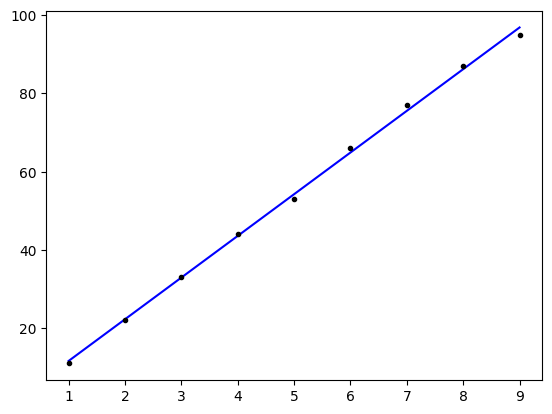

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

plt.plot(x, model.predict(x), 'b', x, y, 'k.')

### Funtional API 모델
- 각 층을 일종의 함수(function)로서 정의
- 각 함수를 조합하기 위한 연산자들을 제공하여 신경망을 설계
- Functional API는 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의

### ① 전결합 피드 포워드 신경망(Fully-connected FFNN)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))    # 10개의 입력층
hidden1 = Dense(64, activation='relu')(inputs)  
hidden2 = Dense(64, activation='relu')(hidden1) 
output = Dense(1, activation='sigmoid')(hidden2) 
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)

# ------------------------------------------ 변수명 x로 통일
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

### ② 선형 회귀 Linear Regression

Epoch 1/300
1/1 [==============================] - 0s 205ms/step - loss: 3614.8640 - mse: 3614.8640
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 445.8438 - mse: 445.8438
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 55.9185 - mse: 55.9185
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 7.9400 - mse: 7.9400
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 2.0355 - mse: 2.0355
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3079 - mse: 1.3079
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2174 - mse: 1.2174
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2052 - mse: 1.2052
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2027 - mse: 1.2027
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2013 - mse: 1.2013
Epoch 11/300
1/1 [==============================] - 0s 4ms/step -

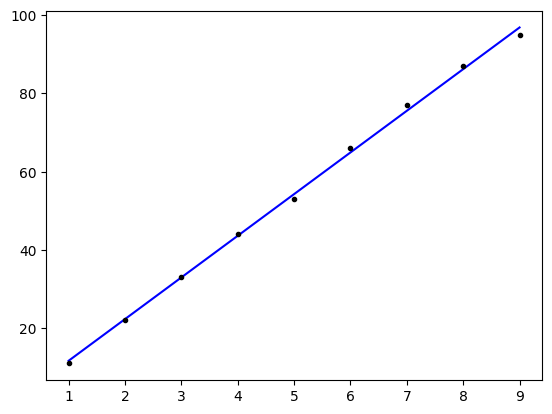

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

plt.plot(x, linear_model.predict(x), 'b', x, y, 'k.')

### ③ 로지스틱 회귀 Logistic Regression

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

# plt.plot(x, logistic_model.predict(x), 'b', x, y, 'k.')

### ④ 다중 입력을 받는 모델(model that accepts multiple inputs)
- 예: 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

### ⑤ RNN(Recurrence Neural Network) 은닉층 사용
- 예: 하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

https://wikidocs.net/106897

## 7-10 케라스 서브클래싱 API

Sequential API는 간단한 모델을 구현하기에 적합합니다. Functional API로는 Sequential API로 구현할 수 없는 복잡한 모델들을 구현가능합니다. 그런데 Subclassing API로는 Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있습니다. Functional API는 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급합니다. 실제로 대부분의 딥 러닝 모델이 이에 속하기는 하지만, 항상 그렇지는 않습니다. 예를 들어서 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없습니다.

이를 반대로 해석하면 대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능하다는 의미이기도 합니다. 그래서 Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합합니다.

## 7-11. 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

## 7-12. 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

- 기계가 자연어를 표현하도록 규칙으로 명세하기가 어려운 상황에서 대안은 규칙 기반 접근이 아닌 기계가 주어진 자연어 데이터를 학습하게 하는 것
- 과거에는 기계가 자연어를 학습하게 하는 방법으로 통계적인 접근(통계적 언어 모델,Statistical Language Model, SLM)을 사용했으나, 최근에는 인공 신경망을 사용하는 방법이 자연어 처리에서 더 좋은 성능을 얻고 있음 (예: 자연어생성, Natural Language Generation, NLG)

- 피드 포워드 신경망 언어 모델(Feed Forward Neural Network Language Model): 신경망 언어 모델의 시초

### 1) 기존 N-gram 언어 모델의 한계
- n-gram 언어 모델은 언어 모델링에 바로 앞 n-1개의 단어를 참고, 더 앞의 단어들은 무시
- 문제점: 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못하는 희소 문제(sparsity problem). 훈련 코퍼스에 단어 시퀀스가 존재하지 않으면, 해당 단어 시퀀스의 확률값이 0이 됨

### 2) 단어의 의미적 유사성
- 희소 문제는 기계가 단어의 의미적 유사성을 알수 있다면 해결 가능
- 이러한 아이디어를 반영한 언어 모델이 신경망 언어 모델 NNLM, 단어 벡터 간 유사도를 구할 수 있는 벡터를 얻어내는 워드 임베딩(word embedding)

### 3) 피드 포워드 신경망 언어 모델(NNLM)
- NNLM은 n-gram 언어 모델처럼 다음 단어를 예측할 때, 앞의 모든 단어를 참고하는 것이 아니라 정해진 개수의 단어만을 참고

- 예시) "what will the fat cat sit on"
    - (n-gram) window가 4라고 가정 시, 다음 단어를 예측하기 위해 앞의 4개 단어 'will the fat cat'까지만 참고하고 그 앞 단어인 what은 무시
    <br> vs (NNLM) 출력층(output layer)은 모델이 예측해야하는 정답에 해당되는 단어 sit의 원-핫 벡터는 모델이 예측한 값의 오차를 구하기 위해 레이블로서 사용됨. 그리고 오차로부터 손실 함수를 사용하여 인공 신경망이 학습함

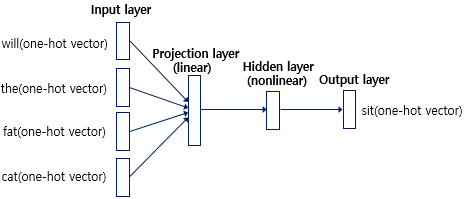

In [2]:
Image('Data/230628/19.png')

4개의 원-핫 벡터를 입력 받은 NNLM은 다음층인 투사층(projection layer). 가중치 곱셈 있으나 활성화함수 없음

투사층의 크기를 M으로 설정하면, 각 입력 단어들은 투사층에서 V × M 크기의 가중치 행렬과 곱해짐
만약 원-핫 벡터의 차원이 7이고, M이 5라면 가중치 행렬 W는 7 × 5 행렬이 됨

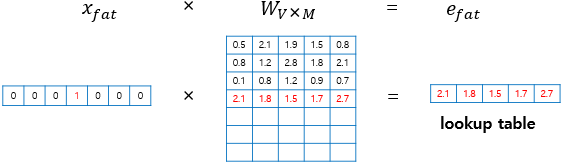

In [3]:
Image('Data/230628/20.png')

원-핫 벡터와 가중치 W 행렬의 곱은 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일함. 그래서 이 작업을 룩업 테이블(lookup table)이라고 함

결국 V차원을 가지는 원-핫 벡터는 이보다 더 차원이 작은 M차원의 벡터로 매핑됨

이 벡터들은 초기에는 랜덤한 값을 가지지만 학습 과정에서 값이 계속 변경되는데 이 단어 벡터를 임베딩 벡터(embedding vector)라고 함

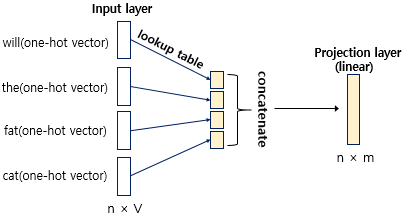

In [4]:
Image('Data/230628/21.png')

각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결됨(concatenate). 여기서 벡터의 연결 연산은 벡터들을 이어붙이는 것을 의미함

가령, 5차원 벡터 4개를 연결한다는 의미는 20차원 벡터를 얻는다는 의미

#### ▶ Projection layer 투사층: 활성화함수가 존재하지 않는 선형층임

$$ p^{layer} = (lookup(x_{t-n});....;lookup(x_{t-2});lookup(x_{t-1})) = (e_{t-n};...;e_{t-1}) $$

투사층의 결과는 h의 크기를 가지는 은닉층을 지나게 됨

#### ▶ Hidden layer 은닉층: 활성화함수를 비선형으로 사용(하이퍼볼릭탄젠트)
$$h^{layer} = tanh(W_hp^{layer} + b_h) $$

출력은 V의 크기를 가지는 출력층으로 향함. 이 과정에서 다시 또 다른 가중치와 곱해지고 편향이 더해지면, 입력이었던 원-핫 벡터들과 동일하게 V차원의 벡터를 얻게 됨

#### ▶ Output layer 출력층: 활성화함수로 softmax사용

$$ \hat{y} = softmax(W_yh^{layer} + b_y) $$

V차원의 벡터는 소프트맥스 함수를 지나면서 벡터의 각 원소는 0 ~ 1 의 실수값을 가지며 총 합은 1이 되는 상태가 됨

$\hat{y}$의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 다음 단어일 확률을 나타냄

#### ▶ 손실함수: 크로스 엔트로피(cross-entropy) 함수 사용
모든 단어라는 V개의 선택지 중 정답인 'sit'을 예측해야하는 다중 클래스 분류 문제이므로 cross-entropy 사용

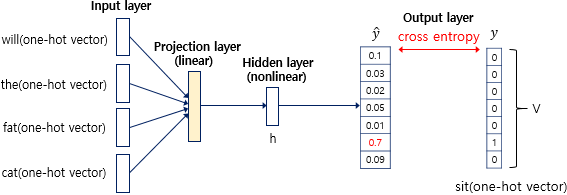

In [5]:
Image('Data/230628/22.png')

### 이점

- NNLM의 핵심은 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습한다면 결과적으로 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻게된다는 것. 이렇게 되면 훈련이 끝난 후 다음 단어를 예측 과정에서 훈련 코퍼스에서 없던 단어 시퀀스라 하더라도 다음 단어를 선택할 수 있음
<br> 임베딩 벡터를 사용하므로서 단어의 유사도를 계산할 수 있음. 이를 통해 희소 문제(sparsity problem)를 해결


### 한계
- NNLM은 n-gram 언어 모델과 마찬가지로 다음 단어를 예측하기 위해 모든 이전 단어를 참고하는 것이 아니라 정해진 n개의 단어만을 참고할 수 있음
- 이 한계를 극복할 수 있는 언어 모델이 RNN(Recurrent Neural Network)을 사용한 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)임